### **Random Forest**

In [1]:
import pandas as pd

#from google.colab import drive
#drive.mount('/content/drive')

#df= pd.read_csv("/content/drive/MyDrive/preprocessed_file_v1_filtered", sep="\t")
df= pd.read_csv("preprocessed_file_v2_filtered", sep="\t")

C:\Users\Sami\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1350,1351,1352,1353) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
features= df.drop(['SAMPLE_ID'], axis = 1)
features.head()

,NRAS,ATM,KRAS,AKT1,TP53,ERBB2,CTNNB1,PIK3CA,KIT,APC,...,KIF5B,PTTG1,CANCER_TYPE,SEX,PRIMARY_RACE,ETHNICITY,YEAR_CONTACT,DEAD,YEAR_DEATH,AGE_AT_SEQ_REPORT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,Glioma,Male,White,Non-Spanish/non-Hispanic,Unknown,Unknown,Unknown,<18
1,0,0,0,0,0,0,0,0,0,0,...,0,0,Leukemia,Female,White,Non-Spanish/non-Hispanic,Unknown,TRUE,2018,<18
2,0,0,0,0,0,0,0,0,0,0,...,0,0,Leukemia,Female,White,Non-Spanish/non-Hispanic,Unknown,TRUE,2018,<18
3,0,0,0,0,0,0,0,0,0,0,...,0,0,Leukemia,Female,White,Non-Spanish/non-Hispanic,Unknown,TRUE,2018,<18
4,0,0,0,0,0,0,0,0,0,0,...,0,0,Glioma,Male,White,Non-Spanish/non-Hispanic,Unknown,Unknown,Unknown,<18


In [3]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
df.CANCER_TYPE = pd.Categorical(df.CANCER_TYPE)
df.CANCER_TYPE = df.CANCER_TYPE.cat.codes
labels = np.array(df['CANCER_TYPE'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('CANCER_TYPE', axis = 1)

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)


# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [4]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (73188, 1657)
Training Labels Shape: (73188,)
Testing Features Shape: (24396, 1657)
Testing Labels Shape: (24396,)


### **Train Model**

In [5]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 800, random_state = 42, verbose=2)
# Train the model on training data
rf.fit(train_features, train_labels);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 800


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800
building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
building tree 43 of 800


building tree 334 of 800
building tree 335 of 800
building tree 336 of 800
building tree 337 of 800
building tree 338 of 800
building tree 339 of 800
building tree 340 of 800
building tree 341 of 800
building tree 342 of 800
building tree 343 of 800
building tree 344 of 800
building tree 345 of 800
building tree 346 of 800
building tree 347 of 800
building tree 348 of 800
building tree 349 of 800
building tree 350 of 800
building tree 351 of 800
building tree 352 of 800
building tree 353 of 800
building tree 354 of 800
building tree 355 of 800
building tree 356 of 800
building tree 357 of 800
building tree 358 of 800
building tree 359 of 800
building tree 360 of 800
building tree 361 of 800
building tree 362 of 800
building tree 363 of 800
building tree 364 of 800
building tree 365 of 800
building tree 366 of 800
building tree 367 of 800
building tree 368 of 800
building tree 369 of 800
building tree 370 of 800
building tree 371 of 800
building tree 372 of 800
building tree 373 of 800


building tree 662 of 800
building tree 663 of 800
building tree 664 of 800
building tree 665 of 800
building tree 666 of 800
building tree 667 of 800
building tree 668 of 800
building tree 669 of 800
building tree 670 of 800
building tree 671 of 800
building tree 672 of 800
building tree 673 of 800
building tree 674 of 800
building tree 675 of 800
building tree 676 of 800
building tree 677 of 800
building tree 678 of 800
building tree 679 of 800
building tree 680 of 800
building tree 681 of 800
building tree 682 of 800
building tree 683 of 800
building tree 684 of 800
building tree 685 of 800
building tree 686 of 800
building tree 687 of 800
building tree 688 of 800
building tree 689 of 800
building tree 690 of 800
building tree 691 of 800
building tree 692 of 800
building tree 693 of 800
building tree 694 of 800
building tree 695 of 800
building tree 696 of 800
building tree 697 of 800
building tree 698 of 800
building tree 699 of 800
building tree 700 of 800
building tree 701 of 800


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 30.3min finished


### **Make Predictions**

In [6]:
predictions = rf.predict(test_features)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy: 0.6116576487948844


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   44.8s finished


In [7]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: APC                  Importance: 0.04
Variable: KRAS                 Importance: 0.03
Variable: TP53                 Importance: 0.02
Variable: EGFR                 Importance: 0.02
Variable: SEX_Female           Importance: 0.02
Variable: SEX_Male             Importance: 0.02
Variable: NRAS                 Importance: 0.01
Variable: PIK3CA               Importance: 0.01
Variable: BRAF                 Importance: 0.01
Variable: CDKN2A               Importance: 0.01
Variable: SMAD4                Importance: 0.01
Variable: PTEN                 Importance: 0.01
Variable: IDH1                 Importance: 0.01
Variable: STK11                Importance: 0.01
Variable: VHL                  Importance: 0.01
Variable: ARID1A               Importance: 0.01
Variable: TERT                 Importance: 0.01
Variable: GATA3                Importance: 0.01
Variable: PRIMARY_RACE_Unknown Importance: 0.01
Variable: PRIMARY_RACE_White   Importance: 0.01
Variable: ETHNICITY_Non-Spanish/non-Hisp

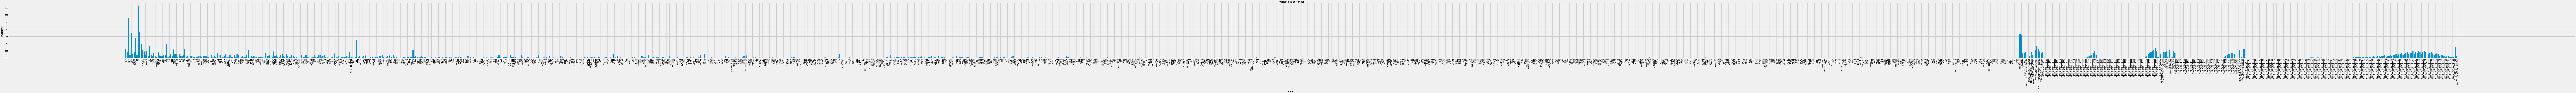

In [8]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(350,8))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

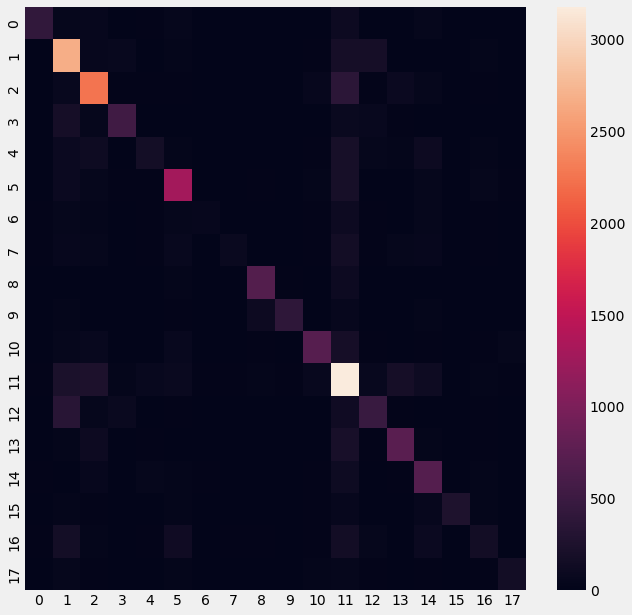

In [9]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, predictions)


# Visualize it as a heatmap
import seaborn
plt.figure(figsize=(10,10))
seaborn.heatmap(conf_mat)
plt.show()

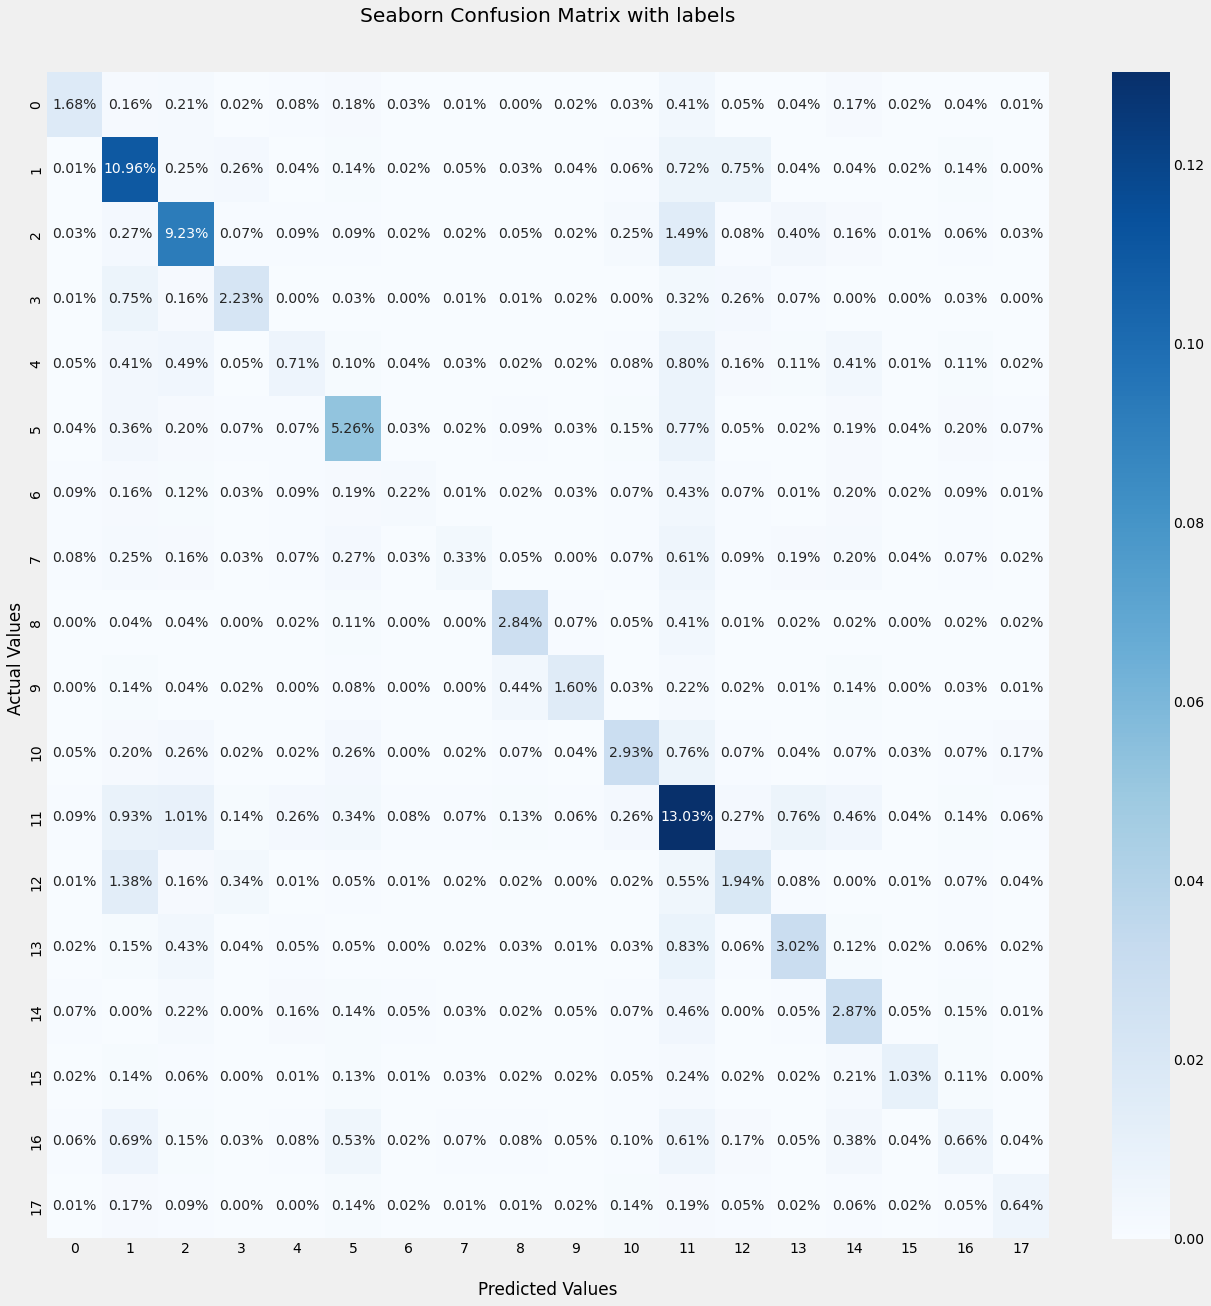

In [10]:
import seaborn as sns
plt.figure(figsize=(20,20))

ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()